In [668]:
from translations import *

import pandas as pd
import matplotlib.pyplot as plt

In [669]:
df = pd.read_csv("data.csv", names=["_", "index", "name", "birthday", "decision-date", "status", "military_category","tel", "onetime", "monthly"])
df.drop(['_', 'index', 'tel', 'name', 'onetime', 'monthly'], axis=1, inplace=True)
df.head(10)

,birthday,decision-date,status,military_category
0,"10 Հուլ, 1975","14 Հոկ, 2020",Անհայտ բացակայող,Զորահավաք. շարք
1,"21 Հուն, 1993","14 Հոկ, 2020",Զոհված,Պայմանագրային սպա
2,"28 Ապր, 1988","05 Հոկ, 2020",Զոհված,Զորահավաք. շարք
3,"03 Օգս, 2001","08 Հոկ, 2020",Զոհված,Պարտադիր ժամկետ.
4,"31 Օգս, 1989","11 Հոկ, 2020",Անհայտ բացակայող,Պայմանագրային շարք
5,"15 Հնվ, 1985","16 Հոկ, 2020",II խմբի հաշմանդամ,Զորահավաք. շարք
6,"08 Սեպ, 2000","29 Սեպ, 2020",Անհայտ բացակայող,Պարտադիր ժամկետ.
7,"26 Նոյ, 1997","01 Նոյ, 2020",I խմբի հաշմանդամ,Պայմանագրային սպա
8,"28 Հոկ, 2000","07 Նոյ, 2020",Զոհված,Պարտադիր ժամկետ.
9,"13 Հուն, 2002","17 Հոկ, 2020",Անհայտ բացակայող,Պարտադիր ժամկետ.


### Data Cleaning & Translation

In [670]:
# Filtering year of birth
df[['day', 'month','birthyear']] = df['birthday'].str.split(" ", 2, expand=True)
df.drop(['birthday','day', 'month'], axis=1, inplace=True)

# Filtering year of status decision
df[['day', 'month','date']] = df['decision-date'].str.split(" ", 2, expand=True)
df.drop(['decision-date','day', 'month'], axis=1, inplace=True)

# Age
df['age'] = df['date'].astype(int) - df['birthyear'].astype(int)

# Translating status
df.replace({"status": status_translation}, inplace=True)
df.replace({"military_category": rank_translation}, inplace=True)

# dtype
df['birthyear'] = df['birthyear'].astype(int)
df['date'] = df['date'].astype(int)

# Invalid Date filters
df = df[df['date']>2019]
df = df[df['birthyear']!=2021]
df = df[df['birthyear']!=2020]

df.head(5)

,status,military_category,birthyear,date,age
0,missing,reserve,1975,2020,45
1,deceased,contractor,1993,2020,27
2,deceased,reserve,1988,2020,32
3,deceased,conscript,2001,2020,19
4,missing,contractor,1989,2020,31


In [671]:
def hist_by_category(df: object, column: str, title: str, x: str, y: str, kind: str) -> None:
        """
        This function plots barchart for a given dataframe column.
        ---
        Args:
                df (object): pandas DataFrame
                column(str): column name
                title (str): figure title
                x (str): x axis title
                y (str): y axis title
                kind (str): plot type (bar, barh, hist..)

        Returns:
                None
        """
        # Creating Figure & Axes
        fig, ax = plt.subplots(figsize=(16,9))
        ax = df[column].value_counts(sort=True).plot(kind=kind)
        

        # Setting Labels
        ax.set_title( title, fontsize=20, pad=20)
        ax.set_xlabel(x, fontsize=15)
        ax.set_ylabel(y, fontsize=15)

        # Legend & Grid
        ax.grid(linestyle=":", color='#696969')

        # Watermark
        ax.text(0.99, 
                0.01,
                '© Github/Geometrein',
                verticalalignment='bottom',
                horizontalalignment='right',
                transform=ax.transAxes,
                color='#606060',
                fontsize=15,
                alpha = 0.9)

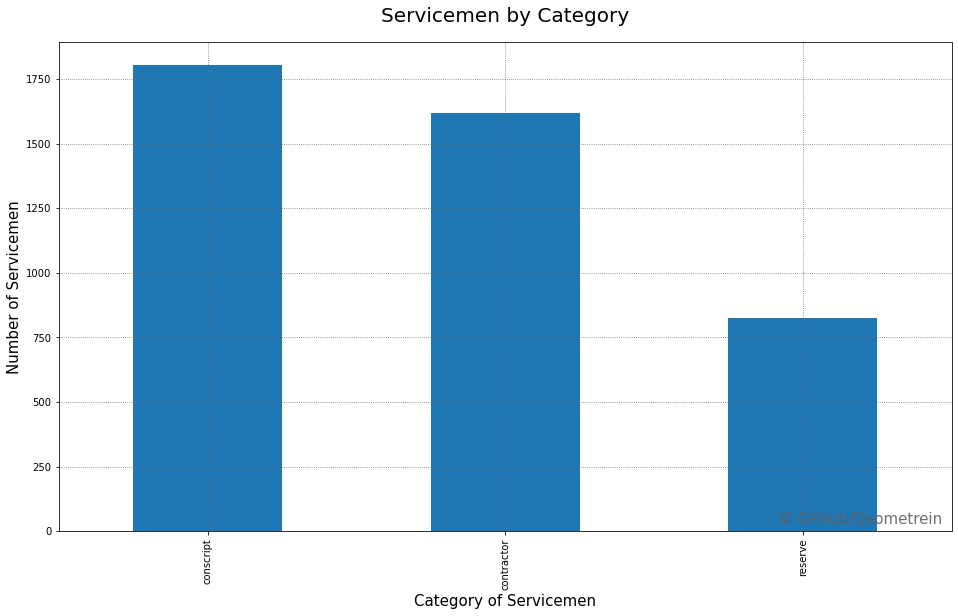

In [672]:
column = 'military_category'
title = "Servicemen by Category"
x = 'Category of Servicemen'
y = 'Number of Servicemen'

hist_by_category(df, column, title, x, y, 'bar')

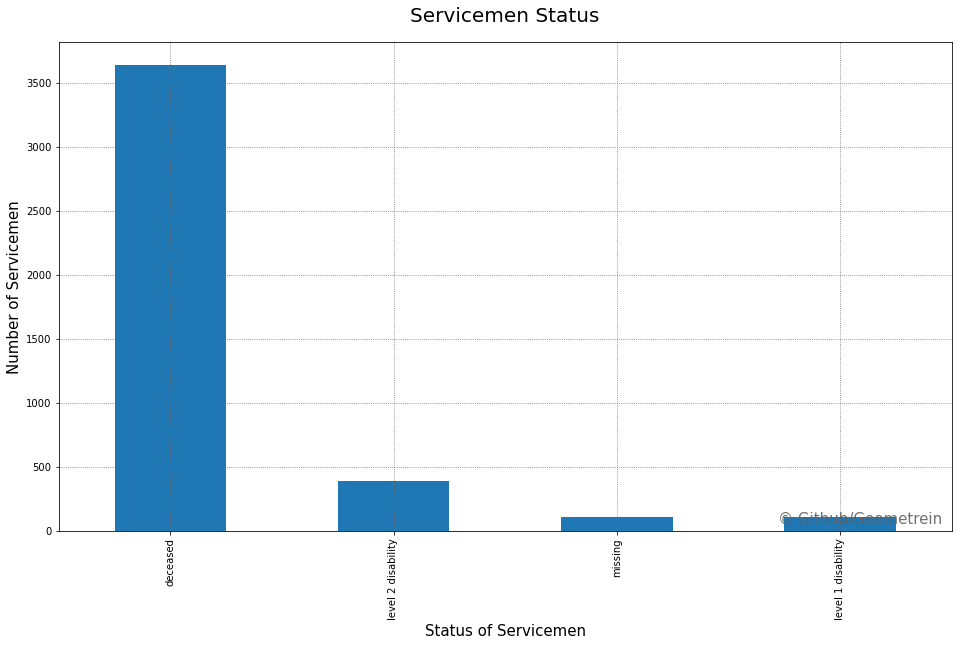

In [673]:
column = 'status'
title = "Servicemen Status"
x = 'Status of Servicemen'
y = 'Number of Servicemen'

hist_by_category(df, column, title, x, y,'bar')

## Causalities
---

In [674]:
deaths_df = df[df['status'] == 'deceased']
deaths_df['age'].describe()

count    3636.000000
mean       28.108086
std        10.591379
min        18.000000
25%        19.000000
50%        24.000000
75%        35.000000
max        71.000000
Name: age, dtype: float64

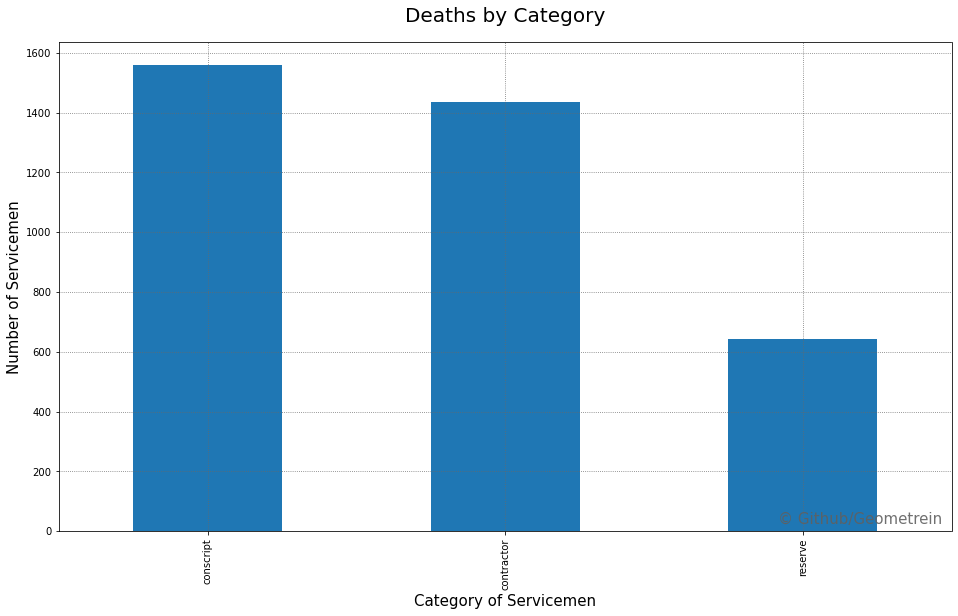

In [675]:
column = 'military_category'
title = "Deaths by Category"
x = 'Category of Servicemen'
y = 'Number of Servicemen'

hist_by_category(deaths_df, column, title, x, y,'bar')

### Deaths by Age

Text(0.99, 0.01, '© Github/Geometrein')

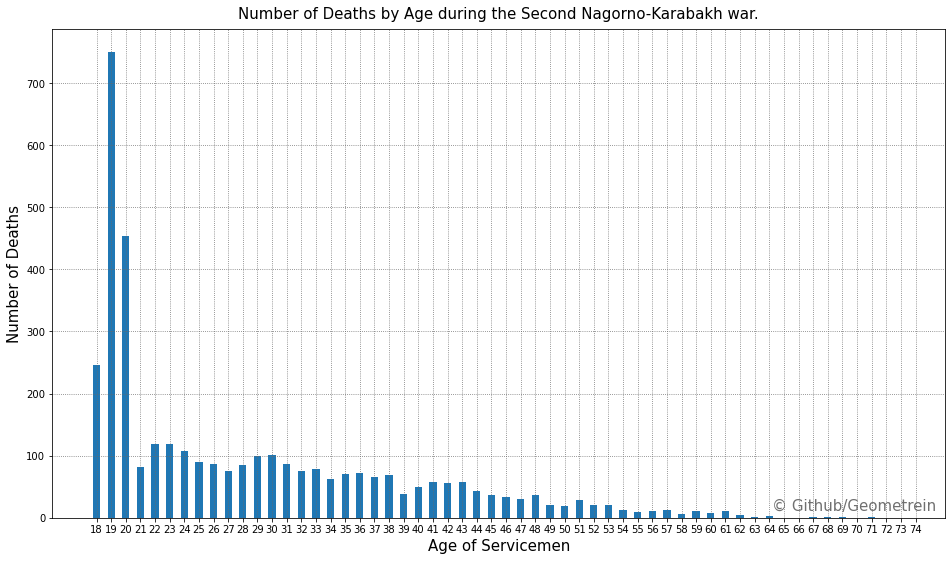

In [676]:
column = 'age'
title = "Number of Deaths by Age during the Second Nagorno-Karabakh war."
x = 'Age of Servicemen'
y = 'Number of Deaths'

# Creating Figure & Axes
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(deaths_df[column], bins = range(18,75), rwidth=0.5, align='left')

# Setting Labels
ax.set_title( title, fontsize=15, pad=10)
ax.set_xlabel(x, fontsize=15)
ax.set_ylabel(y, fontsize=15)

ax.set_xticks(range(18, 75, 1))
ax.set_yticks(range(0, 800, 100))

# Legend & Grid
ax.grid(linestyle=":", color='#696969')

# Watermark
ax.text(0.99, 
        0.01,
        '© Github/Geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='#606060',
        fontsize=15,
        alpha = 0.9
)

Text(0.99, 0.01, '© Github/Geometrein')

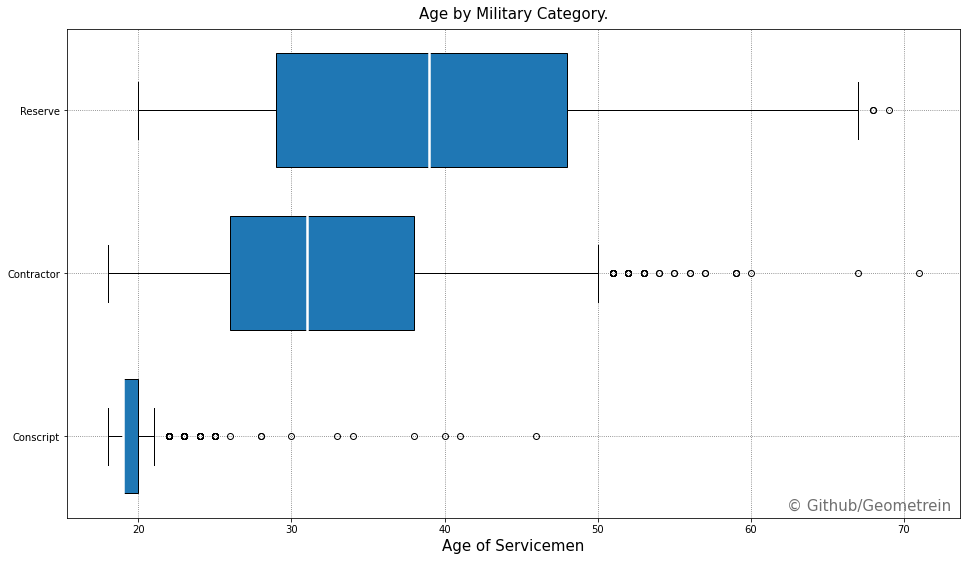

In [677]:
conscrips = deaths_df[deaths_df['military_category'] == 'conscript']
contractors = deaths_df[deaths_df['military_category'] == 'contractor']
reserve = deaths_df[deaths_df['military_category'] == 'reserve']
data = [conscrips['age'], contractors['age'], reserve['age']]

title = "Age by Military Category."
x = 'Age of Servicemen'

# Creating Figure & Axes
fig, ax = plt.subplots(figsize=(16,9))
medianprops = dict(linestyle='-', linewidth=2.5, color='white')
box = ax.boxplot(data, vert=False, patch_artist=True, widths=0.7, whis = 1, medianprops=medianprops)

# Setting Labels
ax.set_title( title, fontsize=15, pad=10)
ax.set_xlabel(x, fontsize=15)
ax.set_yticklabels(['Conscript', 'Contractor', 'Reserve'])

# Legend & Grid
ax.grid(linestyle=":", color='#696969')

# Watermark
ax.text(0.99, 
        0.01,
        '© Github/Geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='#606060',
        fontsize=15,
        alpha = 0.9
)
